# Cleaning Data, Standardisation, Normalisation and Binning

This module cover my notes from this pluralsight module.

## Understanding Data Cleaning and Preparation Techniques

Two sets of statistical tools:
- Descriptive stats: identify important elements in a dataset
- inferential stats: explain those elements via relationships with other elements

what a data professional should do:
- find the dots in the data
    - missing values
    - outliers
        - genuine outliers
        - erroneously measured points
- connect the dots
    - spreadsheets
    - programming languages
    - sql

Choosing technology (from least to most powerful):
- Excel
- Python with Pandas
- Azure SQL DB
- Python with Spark
- Azure Data Warehouse

Dealing with missing data:
- Deletion (listwise deletion)
    - most common method
    - can reduce sample size
    - can introduce bias
- Imputation
    - fill in missing 
    - simple method: use average
    - other method: interpolate
    - other method: use a ML model

Different types of imputation:
- Hot-deck Imputation
    - sort records based on criteria
    - for each misssing value, use immediately prior available value
    - Last observation carried forward
- Mean substitution
    - substitute mean for all missing
    - doesnt change mean for each variable
    - can weaken correlation between variables
- fit a model  
    - e.g. regression. This can strengthen correlations between variables.

What about Outliers?
An outlier is a data point that significantly differs from other data points.

Make sure to identify outliers and then deal with it.

How to identify outliers?
- distance from the mean
    - Remember: the mean is a single number that best represents all of the data points. 
    - You can use the range too - this will tell you the dispersion of the data
    - Variance: is the second most important number to summarise how the data varies
    - improve variance by using Bessels correlation
    - Standard Deviation can also detect outliers
- distancer from fitted line

How to deal with outliers?
- drop outliers - if you think they're errors
- Cap/Floor - keep data in a range you want
- set to mean



# Cleaning Data

## Fill missing values

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
toy_df = pd.DataFrame(
    {
        'numbers':[1,2,3,np.nan,np.nan,np.nan,7]
    }
)
toy_df

,numbers
0,1.0
1,2.0
2,3.0
3,NaN
4,NaN
5,NaN
6,7.0


Lets determine how many rows have missing values in our data by using the `.isnull()` method, and summing the output

In [3]:
toy_df.isnull().sum()

numbers    3
dtype: int64

Lets remove any missing values using the `dropna()` method. This removes any rows with a missing value.

In [4]:
dropped_toy_df = toy_df.dropna()
dropped_toy_df

,numbers
0,1.0
1,2.0
2,3.0
6,7.0


Now, lets fill in rows that have a missing value with:

In [6]:
# fill with o
filled_toy_df = toy_df.fillna(0)
filled_toy_df

,numbers
0,1.0
1,2.0
2,3.0
3,0.0
4,0.0
5,0.0
6,7.0


In [7]:
# backfill data
backfilled_toy_df = toy_df.fillna(method='bfill')
backfilled_toy_df

,numbers
0,1.0
1,2.0
2,3.0
3,7.0
4,7.0
5,7.0
6,7.0


In [9]:
# forward fill
forwardfill_toy_df = toy_df.fillna(method='ffill')
forwardfill_toy_df

,numbers
0,1.0
1,2.0
2,3.0
3,3.0
4,3.0
5,3.0
6,7.0


In [10]:
# fill with mean
average_toy_df = toy_df.fillna(toy_df['numbers'].mean())
average_toy_df

,numbers
0,1.00
1,2.00
2,3.00
3,3.25
4,3.25
5,3.25
6,7.00


In [11]:
# interpolate - fill with a new data point from a discrete range of data points
interpolate_toy_df = toy_df.interpolate()
interpolate_toy_df

,numbers
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0


In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('data/mobile-price-train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Data has the label price_range.

In [4]:
df.shape

(2000, 21)

In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df = df.rename(
    columns={
        'blue': 'bluetooth',
        'fc': 'fc_megapixel',
        'pc': 'pc_megapixel',
        'm_dep': 'm_depth'
    }
)

Use duplicated to find which columns are duplicated

In [10]:
dupes = df.duplicated()
dupes.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [14]:
sum(dupes)

0

In [15]:
df.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

how to deal with ouliers?

Lets pull out all the numeric columns

In [16]:
numeric_df = df.drop(['bluetooth','dual_sim', 'four_g', 'three_g','touch_screen','wifi','price_range'], axis=1)
numeric_df.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [18]:
categorical_df = df[['bluetooth','dual_sim', 'four_g', 'three_g','touch_screen','wifi','price_range']]
categorical_df.head()

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

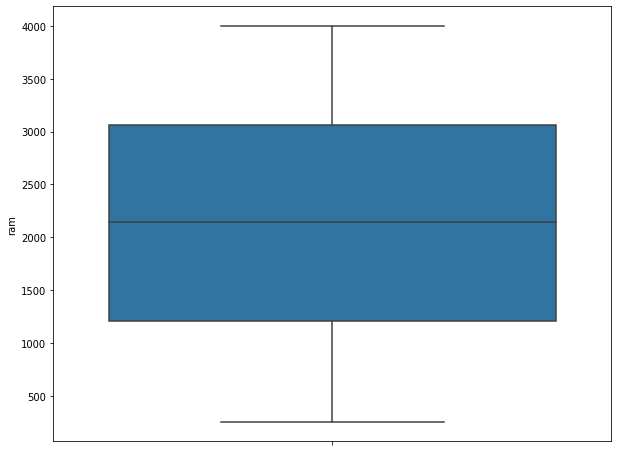

In [22]:
fig, ax = plt.subplots(figsize=[10,8])
sns.boxplot(numeric_df['ram'], orient='v')

[Text(0, 0, 'battery_power'),
 Text(0, 0, 'clock_speed'),
 Text(0, 0, 'fc_megapixel'),
 Text(0, 0, 'int_memory'),
 Text(0, 0, 'm_depth'),
 Text(0, 0, 'mobile_wt'),
 Text(0, 0, 'n_cores'),
 Text(0, 0, 'pc_megapixel'),
 Text(0, 0, 'px_height'),
 Text(0, 0, 'px_width'),
 Text(0, 0, 'ram'),
 Text(0, 0, 'sc_h'),
 Text(0, 0, 'sc_w'),
 Text(0, 0, 'talk_time')]

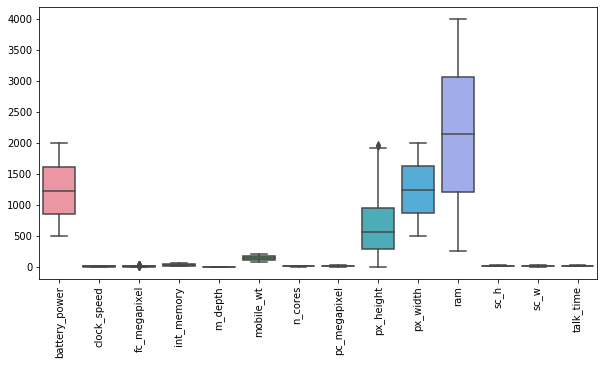

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
bp = sns.boxplot(data=numeric_df)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)

lets calculate Z scores.

We will scale the numeric data to have a mean of 0 and a unit variance.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_array = scaler.fit_transform(numeric_df)

In [25]:
scaled_df = pd.DataFrame(scaled_array, columns=numeric_df.columns)
scaled_df.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240


In [26]:
scaled_df.describe()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.128298e-16,-2.172151e-16,9.230117e-17,-8.754109e-17,-1.045830e-16,1.804112e-16,-4.690692e-17,1.669775e-16,1.287304e-16,5.595524e-17,-1.582068e-16,3.719247e-17,-4.085621e-17,1.052491e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-1.253064e+00,-9.928904e-01,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00
25%,-8.804033e-01,-1.007906e+00,-7.624947e-01,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01
50%,-2.849593e-02,-2.727384e-02,-3.017032e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03
75%,8.575560e-01,8.307794e-01,6.198797e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01
max,1.728812e+00,1.811412e+00,3.384628e+00,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00


[Text(0, 0, 'battery_power'),
 Text(0, 0, 'clock_speed'),
 Text(0, 0, 'fc_megapixel'),
 Text(0, 0, 'int_memory'),
 Text(0, 0, 'm_depth'),
 Text(0, 0, 'mobile_wt'),
 Text(0, 0, 'n_cores'),
 Text(0, 0, 'pc_megapixel'),
 Text(0, 0, 'px_height'),
 Text(0, 0, 'px_width'),
 Text(0, 0, 'ram'),
 Text(0, 0, 'sc_h'),
 Text(0, 0, 'sc_w'),
 Text(0, 0, 'talk_time')]

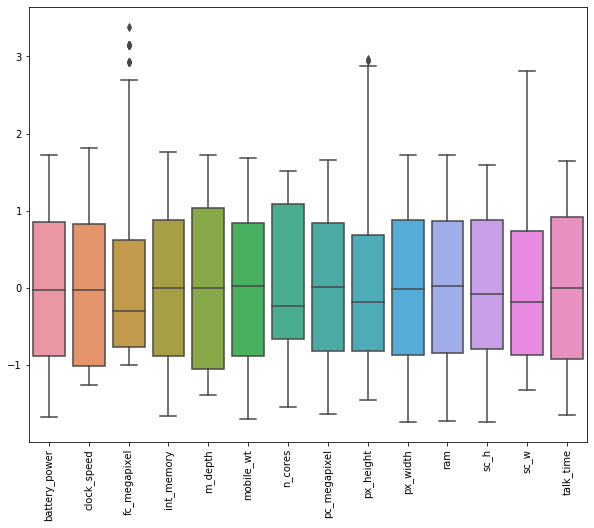

In [27]:
fig, ax = plt.subplots(figsize=(10,8))

bp=sns.boxplot(data=scaled_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

# Colelcting Data to Extract Insights

## Standardisation

This involves:
- find average of each column
- find s.d. for each column
- standardise each value in df: by minus the average and dividing by the s.d. 

this allows you to represent all your datapoints as their z-scores.

Remember, standardisation creates data that has 0 mean and single unit variance. 

The equation is as follows:

z = $\frac{x_(i) - mean(x)}{stdev(x)}$

This allows us to use the mean (measure of central tendency) and s.d. (measure of dispersion)

## Robust Standardisation - an alternative to Standardisation

z = $\frac{x_(i) - median(x)}{inter-quartile range(x)}$

this uses the median (measure of central tendency) and IQR (measure of dispersion)

The output does not change much due to outliers (as opposed to using mean).

## Normalisation

What is Normalisation?  
This involves scaling input vectors individually to unit norm (unit magnitude). This tends to be used for simplifying cosine similarity. 

But what is Cosine Similarity?  
It is the measure of similarity between two non-zero vectors. Lets dig into this a litte further.

It allows us a quick way to view how two vectors align with one another.

REach point in our data (df) is represented by one of these vectors.

With cosine similarity, lets consider two vectors: A and B.

Orthogonal Vectors:  
![Orthogonal Vector image](img/orthogonal.png)
- Vectors at a 90&deg;
- `uncorrelated` 
- are unrelated and independent
- Cosine of 90&deg = 0

Aligned Vectors:  
![Orthogonal Vector image](img/aligned.png)
- Vectors are parallel
- Angle between them is 0
- Perfectly aligned 
- correlation of 1
- cosine of 0 degrees = 1

Opposite Vectors:  
![Opposite Vector image](img/opposite.png)
- Vectors are opposite
- Angle between them is 180 degrees
- Perfectly opposite
- correlation of -1
    
    
Looking at the angle between our two Vectors A and B, we use the following equation:

cos($\theta$) = $\frac{A.B}{||A||||B||}$

So we are looking at dividing the `dot product` by the `magnitude` of the vectors. For coordinate (x, y, z):

$||A||^2$ = $x_A^2 + y_A^2 + z_A^2$   
$||B||^2$ = $x_B^2 + y_B^2 + z_B^2$  
A.B = $x_A$$x_B$ + $y_A$$y_B$ + $z_A$$z_B$

If the magnitude of the two vectors are 1, this would reduce our formula to just the dot product.

This is exactly what `normalisation` does. It converts both our A and B vectors to unit norm vectors to simplify the calculation in order to just get the dot product.

Hence, for our vectors A and B we convert them to unit norm vectors to simplify the calculation:

a = $\frac{A}{||A||}$ = $\frac{x_A,y_A,z_A}{\sqrt{x_A^2 + y_A^2 + z_A^2}}$

b = $\frac{B}{||B||}$ = $\frac{x_B,y_B,z_B}{\sqrt{x_B^2 + y_B^2 + z_B^2}}$

but, make sure to remember that:
- Normalising is a row-wise operation
- Standardisation is a column-wise operation

Normalisation is a general technique used to convert our vectors to a unit norm. There are three different types of Norms defined for vectors:
- L1 Norm:
    - Where the sum of the absolute values of the component vectors are 1
- L2 Norm:
    - Traditional definition of vector magnitude
    - Square root of the sum of the squares is 1
- Max Norm:
    - Largest absolute value of the elements of a vector is set to 1, and other elements are expressed in terms of this largest absolute value


# Binning

Data Binarisation - 2 categories binning  
Data binarisation is where we convert continuous variables into binary categorical variables based on a threshold specified by the user.

Discretising data - more than 2 bins  
Generalises the idea behind binarisation: but instead converts continuous data into categorical data arranged into a specified number of bins.

There are different approaches you can take to how you can bin data into categories. These strategies include:
- Uniform
    - bin widths are constant in each feature
- Quantile
    - All the bins for each column have the same number of samples
- K-means
    - based on centroids of K-Means clustering